In [1]:
from torch.utils.data import DataLoader
from semseg.datasets import DELIVER
import matplotlib.pyplot as plt
from torch.utils.data import RandomSampler
from torch import distributed as dist

In [2]:
dataset = DELIVER(modals=['img', 'depth', 'event', 'lidar'], split='train')
dataset_val = DELIVER(modals=['img', 'depth', 'event', 'lidar'], split='val')
dataset_test = DELIVER(modals=['img', 'depth', 'event', 'lidar'], split='test')

Found 3983 train None images.
Found 2005 val None images.
Found 1897 test None images.


In [3]:
(image, depth, event, lidar), label = dataset[0]

In [4]:
print("Length of classes: ", dataset.n_classes)
for idx, class_ in enumerate(dataset.CLASSES):
    print(f"{idx:02d} : {class_}")

Length of classes:  25
00 : Building
01 : Fence
02 : Other
03 : Pedestrian
04 : Pole
05 : RoadLine
06 : Road
07 : SideWalk
08 : Vegetation
09 : Cars
10 : Wall
11 : TrafficSign
12 : Sky
13 : Ground
14 : Bridge
15 : RailTrack
16 : GroundRail
17 : TrafficLight
18 : Static
19 : Dynamic
20 : Water
21 : Terrain
22 : TwoWheeler
23 : Bus
24 : Truck


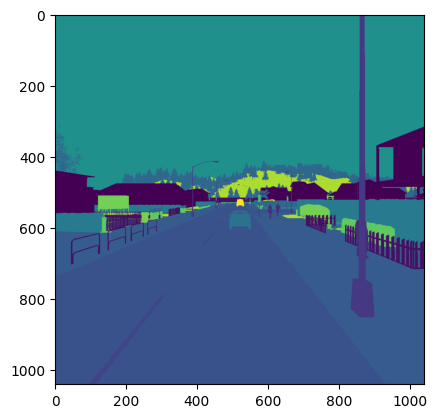

In [5]:
plt.imshow(label)
plt.show()

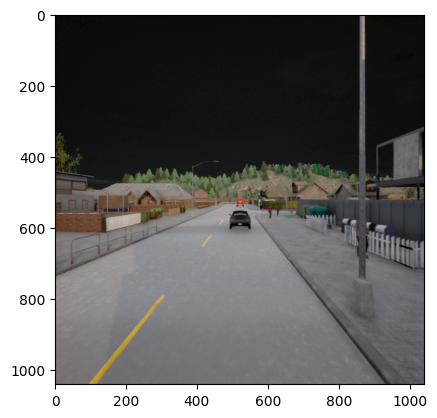

In [6]:
plt.imshow(image.permute(1, 2, 0))
plt.show()

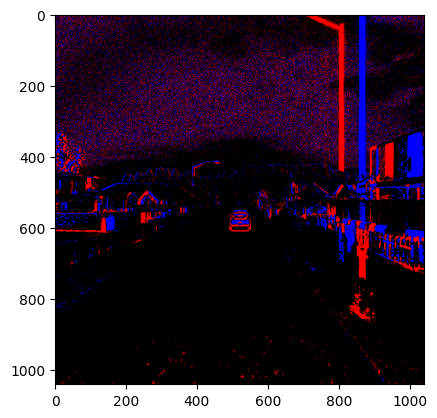

In [7]:
plt.imshow(event.permute(1, 2, 0))
plt.show()

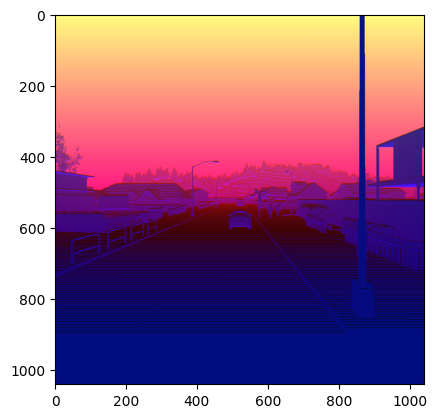

In [8]:
plt.imshow(depth.permute(1, 2, 0))
plt.show()

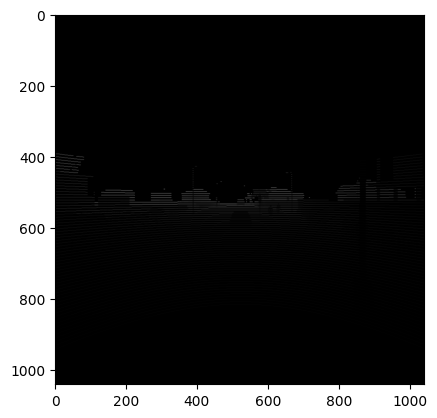

In [9]:
plt.imshow(lidar.permute(1, 2, 0))
plt.show()

In [10]:
sampler = RandomSampler(dataset)
trainloader = DataLoader(dataset,
                             batch_size=2,
                             num_workers=12,
                             drop_last=True,
                             pin_memory=False,
                             sampler=sampler)

In [36]:
data, label = next(iter(trainloader))
print("Number of modalities: ", len(data), " | type: ", type(data))
print("Each Modality shape", " | ".join([str(modality.shape )for modality in data]))
print("Label shape: ", label.shape)
image, depth, event, lidar = data
answer = label[0]
image = image[0]
depth = depth[0]
event = event[0]
lidar = lidar[0]

Number of modalities:  4  | type:  <class 'list'>
Each Modality shape torch.Size([2, 3, 1042, 1042]) | torch.Size([2, 3, 1042, 1042]) | torch.Size([2, 3, 1042, 1042]) | torch.Size([2, 3, 1042, 1042])
Label shape:  torch.Size([2, 1042, 1042])


### Center cropped images

In [22]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [3]:
root = "sample"
files = ["hha_deliver.png", "hha_kitti.png", "lidar_deliver.png", "lidar_kitti.png"]

In [15]:
def center_crop(img, target_width, target_height):
    h, w, = img.shape[:2]
    start_x = (w - target_width) // 2
    start_y = (h - target_height) // 2
    return img[start_y:start_y + target_height, start_x:start_x+target_width]

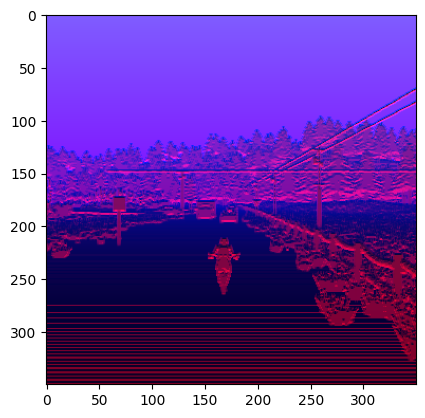

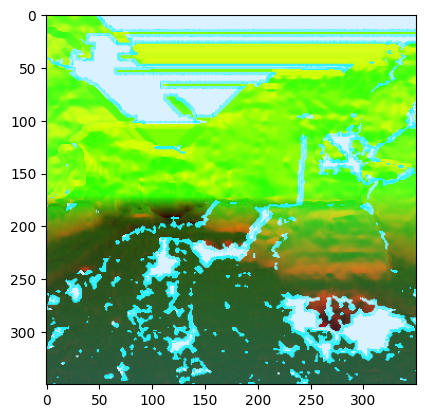

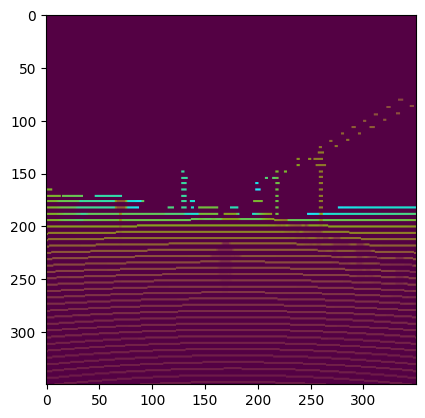

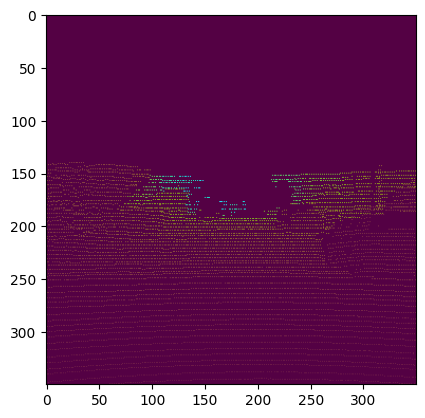

In [30]:
for idx, file_ in enumerate(files):
    file_path = os.path.join(root, file_)
    image = cv2.imread(file_path)
    square = 350
    image_cropped = center_crop(image, square, square)
    # dealing with lidar lets color it
    if idx > 1:
        image_cropped = cv2.normalize(image_cropped, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
        image_cropped = cv2.applyColorMap(image_cropped, cv2.COLORMAP_VIRIDIS)
    plt.imshow(image_cropped)
    plt.show()